###### Step 1: Import all required libraries

In [29]:
import datetime
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import numpy as np
from numpy import random
import scipy as sp
from scipy.stats import norm
import math
%matplotlib inline

###### 3.8, (3 points)
CAPM. The Capital Asset Pricing Model (CAPM) is a financial model that assumes returns on a portfolio are normally distributed. Suppose a portfolio has an average annual return of 14.7% (i.e. an average gain of 14.7%) with a standard deviation of 33%. A return of 0% means the value of the portfolio doesn’t change, a negative return means that the portfolio loses money, and a positive return means that the portfolio gains money. 
Using the properties of the normal distribution please calculate:

a)	What percent of years does this portfolio lose money, i.e. have a return less than 0%? 

b)	What is the cutoff for the highest 15% of annual returns with this portfolio? 

c)	Calculate A and B by using simulation techniques.


(a) Percent of years with (return < 0%): 32.8

(b) Cutoff value for top 15% of returns: 48.9%

(c) First two parts solved using simulation techniques:

	(i) Percent of years with (return < 0%): 0.0

	(ii) Cutoff value for top 15% of returns: 48.05%


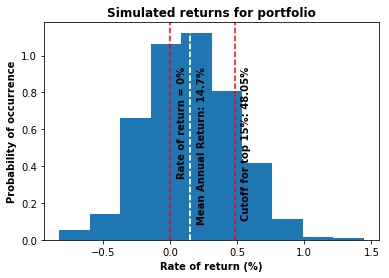

In [22]:
#3.8: Calculations
avgAnnualReturn = 0.147
stdDev = 0.33

## (a)What percent of years does this portfolio lose money, i.e. have a return less than 0%?
targetReturn = 0
probability_0_Returns = norm.cdf(targetReturn, avgAnnualReturn, stdDev)
print "(a) Percent of years with (return < 0%): " + str(round(probability_0_Returns * 100, 2))

## (b) What is the cutoff for the highest 15% of annual returns with this portfolio? 
percentile = (1 - 0.15)
zScore = norm.ppf(percentile)
cutoffValue = (zScore * stdDev) + avgAnnualReturn
print "\n(b) Cutoff value for top 15% of returns: " + str(round(cutoffValue * 100, 2)) + "%"

## (c) Calculate A and B by using simulation techniques.
print "\n(c) First two parts solved using simulation techniques:"
# Step C1: Set seed
random.seed(12345)
# Step C2: generate a list of 1000 normally distributed simulated returns for the portfolio
simulatedReturns_1000 = random.normal(avgAnnualReturn, stdDev, 1000)
# Step C4: sort the array in ascending order
simulatedReturns_1000 = np.sort(simulatedReturns_1000)

# Step C5: find the percentage of simulated values that are less than 0
zeroReturnsList = simulatedReturns_1000[np.where(simulatedReturns_1000 < 0)]
percentZeroReturns = len(zeroReturnsList)/len(simulatedReturns_1000)
print "\n\t(i) Percent of years with (return < 0%): " + str(round(percentZeroReturns * 100, 2))

# Step C6: to find the cut-off for the top 15%, we will pick the 850th value in the sorted array
cutOffValue_Simulated = simulatedReturns_1000[849]
print "\n\t(ii) Cutoff value for top 15% of returns: " + str(round(cutOffValue_Simulated * 100, 2)) + "%" 

# Step C3: Set seed
plt.hist(simulatedReturns_1000, normed=1)
plt.title("Simulated returns for portfolio", fontdict=dict(weight='bold'))
plt.axvline(x = avgAnnualReturn, color = 'white', linestyle='dashed')
plt.text(avgAnnualReturn + 0.05,0.9,'Mean Annual Return: ' + str(avgAnnualReturn * 100) +'%',rotation=90, fontdict=dict(weight='bold'))
plt.axvline(x = 0, color = 'red', linestyle='dashed')
plt.text(0.05,0.9,'Rate of return = 0%',rotation=90, fontdict=dict(weight='bold'))
plt.axvline(x = cutOffValue_Simulated, color = 'red', linestyle='dashed')
plt.text(cutOffValue_Simulated + 0.05,0.9,'Cutoff for top 15%: ' + str(round(cutOffValue_Simulated * 100, 2)) +'%',rotation=90, fontdict=dict(weight='bold'))
plt.axvline(x = avgAnnualReturn, color = 'white', linestyle='dashed')
plt.xlabel("Rate of return (%)", fontdict=dict(weight='bold'))
plt.ylabel("Probability of occurrence", fontdict=dict(weight='bold'))
plt.show()

###### 3.17, 3.31, (2 points)
Game of dreidel. A dreidel is a four-sided spinning top with the Hebrew letters nun, gimel, hei, and shin, one on each side. Each side is equally likely to come up in a single spin of the dreidel. Suppose you spin a dreidel three times. Calculate the probability of getting: 

a)	at least one nun?

b)	exactly 2 nuns? 

c)	exactly 1 hei?

d)	at most 2 gimels? 

e)	Calculate a, b, c and d using simulation techniques.
